# Flipkart Product Recommendation System - Data Preparation
### **Steps:**
1. [Importing Libraries](#1)
2. [Load the dataset](#2)
3. [Data Cleaning](#3) 
4. [Feature Engineering](#4)
5. [Exploratory Data Analysis (EDA)](#5)
6. [Normalize numerical features](#6)
7. [Encode categorical features](#7)
8. [Saving Processed data](#8)


<a name='1'></a>
## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Enable inline plotting for jupyter Notebook
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

<a name="2"></a>
## 2. Load the Dataset

In [2]:
df = pd.read_csv('flipkart_products_20250405.csv')
df.head()

,Product Name,Price (₹),Rating (★),Number of Buyers,Total Sold,Available Stock,Main Category,Sub Category,Discount (%),Seller,Return Policy,Product URL
0,Krishnamurthy-Devan Laboriosam Ultra Smartphon...,142247.04,3.2,7348,4812,364,Electronics,Smartphones,45,RetailNet,False,https://www.flipkart.com/Krishnamurthy-Devan-L...
1,Nanda-Mahal Dignissimos Lite Laptops 1,186922.43,4.1,2342,881,145,Electronics,Laptops,55,Flipkart Assured,False,https://www.flipkart.com/Nanda-Mahal-Dignissim...
2,Choudhury LLC Amet Plus Decor 15,11843.41,5.0,739,2580,206,Home,Decor,58,SuperComNet,True,https://www.flipkart.com/Choudhury-LLC-Amet-Pl...
3,Borah LLC Accusantium Lite Smartphones 9,10864.31,4.8,1543,4562,1585,Electronics,Smartphones,0,ElectroWorld,False,https://www.flipkart.com/Borah-LLC-Accusantium...
4,Murty Inc Placeat Pro Smartwatches 8,32950.41,4.5,7702,4925,1064,Electronics,Smartwatches,18,MobileHub,False,https://www.flipkart.com/Murty-Inc-Placeat-Pro...


<a name="3"></a>
## 3. Data Cleaning

- Missing Values

In [3]:
df.isnull().sum()

Product Name        0
Price (₹)           0
Rating (★)          0
Number of Buyers    0
Total Sold          0
Available Stock     0
Main Category       0
Sub Category        0
Discount (%)        0
Seller              0
Return Policy       0
Product URL         0
dtype: int64

**Note: we found nothing null values but we can see sum columns including icon so we can changing thus columns name**

In [4]:
df.rename(columns={'Price (₹)': 'Price', 'Rating (★)': 'Rating', 'Discount (%)': 'Discount'}, inplace=True)

- Basic Information about DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Name      5000 non-null   object 
 1   Price             5000 non-null   float64
 2   Rating            5000 non-null   float64
 3   Number of Buyers  5000 non-null   int64  
 4   Total Sold        5000 non-null   int64  
 5   Available Stock   5000 non-null   int64  
 6   Main Category     5000 non-null   object 
 7   Sub Category      5000 non-null   object 
 8   Discount          5000 non-null   int64  
 9   Seller            5000 non-null   object 
 10  Return Policy     5000 non-null   bool   
 11  Product URL       5000 non-null   object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 434.7+ KB


- Statistical Summary

In [6]:
df.describe()

,Price,Rating,Number of Buyers,Total Sold,Available Stock,Discount
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,35884.094350,4.003640,5044.425600,5005.066200,1250.870200,26.208000
std,39867.681428,0.584742,2886.016013,2897.042048,1109.872427,23.484332
min,100.450000,3.000000,11.000000,50.000000,0.000000,0.000000
25%,12275.502500,3.500000,2553.750000,2495.000000,323.750000,0.000000
50%,27761.010000,4.000000,5099.500000,4972.500000,916.000000,23.000000
75%,42852.247500,4.500000,7575.500000,7571.500000,1934.250000,47.000000
max,249158.910000,5.000000,10000.000000,10000.000000,4924.000000,70.000000


<a name="4"></a>
## 4. Feature Engineering

In [7]:
df['Popularity'] = df['Number of Buyers'] * df['Rating']

- Create price categories

In [8]:
bins = [0, 1000, 5000, 10000, 20000, 50000, 100000, 200000, float('inf')]
labels = ['<1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k-200k', '>200k']
df['Price_Category'] = pd.cut(df['Price'], bins=bins, labels=labels)

<a name="5"></a>
## 5. Exploratory Data Analysis (EDA)
**Univariate Analysis:**
- 5.1 Price Distribution
- 5.2 Rating Distribution
- 5.3 Number of Buyers Distribution

**Bivariate Analysis:**
- 5.4 Popularity vs Rating
- 5.5 Price vs Rating

**Categorical Features:**
- 5.6 Top Main Categories
- 5.7 Top 5 Sub Categories
- 5.8 Top 5 Sellers

**Correlation Analysis**

---------------------------------------------------------------------------

**Univarite Analysis:**
- 5.1 Price Distibution

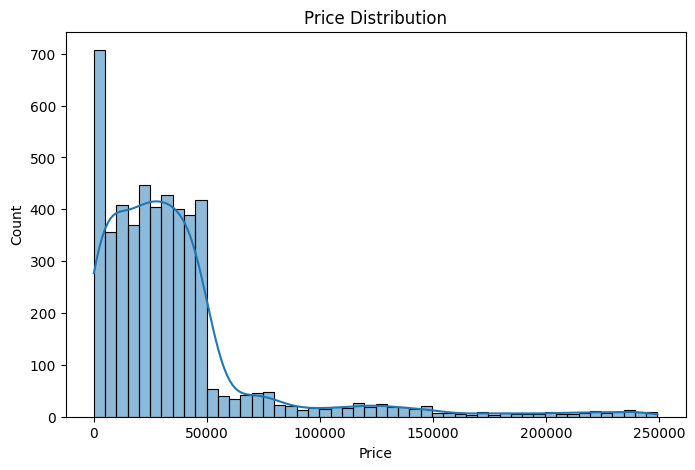

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.show()

- 5.2 Rating Distribution

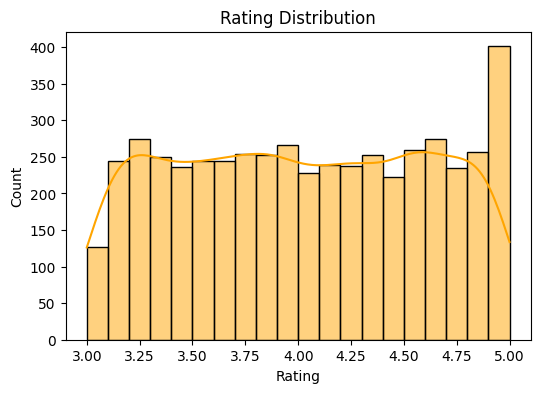

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], bins=20, kde=True, color='orange')
plt.title('Rating Distribution')
plt.xlabel("Rating")
plt.show()

- 5.3 Number of Buyers Distribution

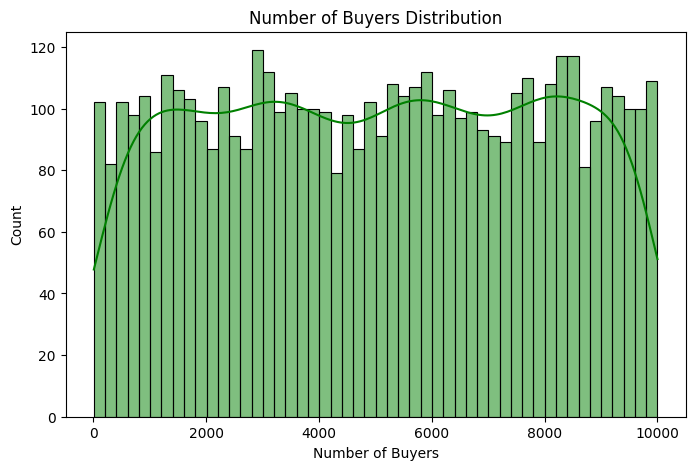

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["Number of Buyers"], bins=50, kde=True, color='green')
plt.title("Number of Buyers Distribution")
plt.xlabel("Number of Buyers")
plt.show()

**Bivariate Analysis:**
- 5.4 Popularity vs. Rating

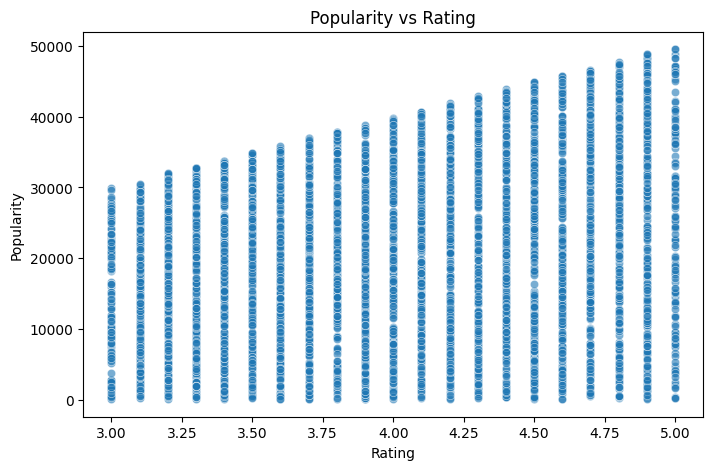

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Rating', y='Popularity', alpha=0.6)
plt.title("Popularity vs Rating")
plt.xlabel("Rating")
plt.ylabel("Popularity")
plt.show()

This scatter plot visualizes the relationship between **product rating** and its **calculated popularity** (Popularity = Number of Buyers × Rating).

**Observations:**
- Popularity increases as the rating increases.
- There are dense vertical lines at each rating level (especially from 4.0 to 5.0), indicating many products with similar ratings but varying buyer counts.
- This correlation is expected, as rating is a factor in the popularity formula.

**Conclusion:**
- Products with higher ratings are generally more popular.
- The **Popularity metric is effective** for ranking and recommending products in the system.
- **High-rating + high buyer count = great candidate for recommendation.**


- 5.5 Price vs. Rating

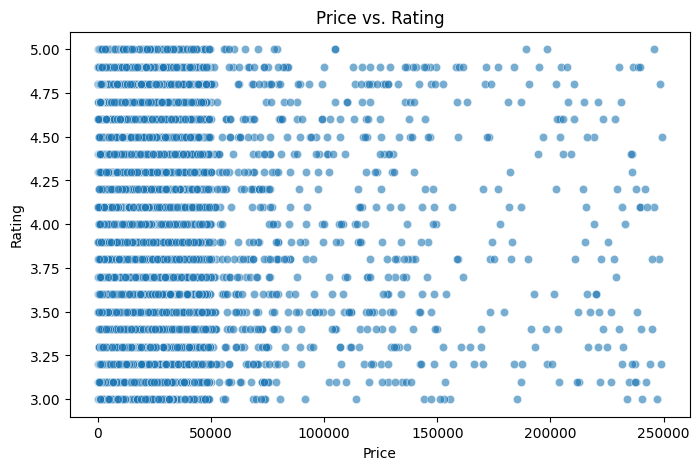

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Price', y='Rating', alpha=0.6)
plt.title('Price vs. Rating')
plt.xlabel("Price")
plt.ylabel("Rating")
plt.show()

This scatter plot shows how product **price** correlates with **rating**.

**Observations:**
- Most products are priced under ₹50,000
- Ratings are spread fairly evenly across all price ranges.
- Even low-priced products receive high ratings.

**Conclusion:**
- There is **no strong correlation** between price and rating.
- Affordable products can still have excellent ratings.
- So recommender system should not bias too much towards expensive items—**high-rated budget items are highly valuable** to users.

**Categorical Features Analysis:**
- 5.6 Top Main Categories

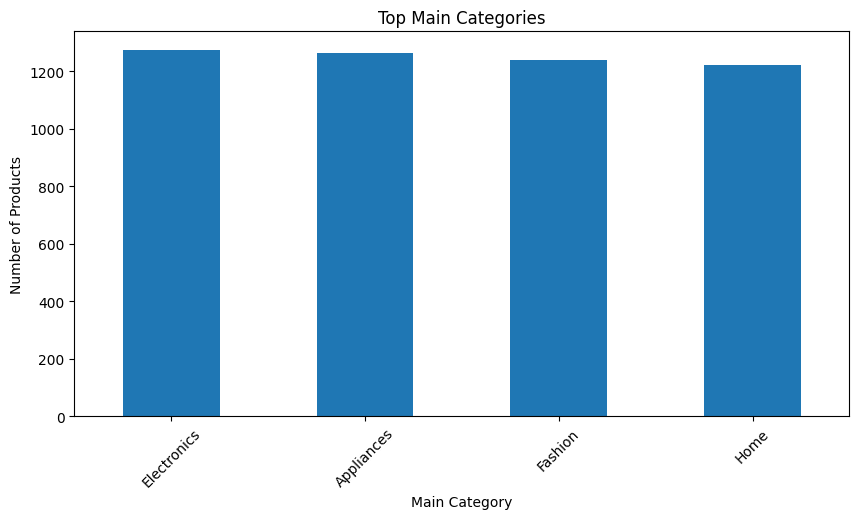

In [14]:
plt.figure(figsize=(10,5))
df["Main Category"].value_counts().plot(kind='bar')
plt.title("Top Main Categories")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

- 5.7 Top 5 Sub Categories

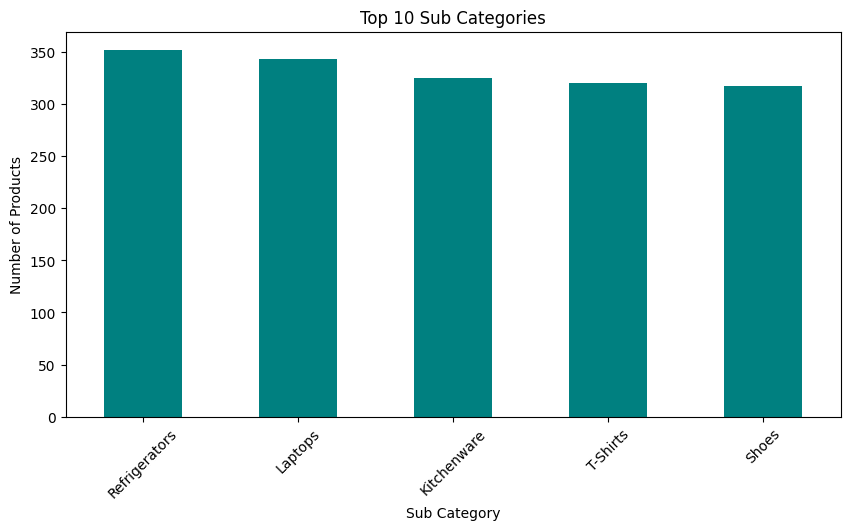

In [15]:
plt.figure(figsize=(10,5))
df['Sub Category'].value_counts().head(5).plot(kind='bar', color='teal')
plt.title("Top 10 Sub Categories")
plt.ylabel("Number of Products")
plt.xticks(rotation=45)
plt.show()

- 5.8 Top 5 Sellers

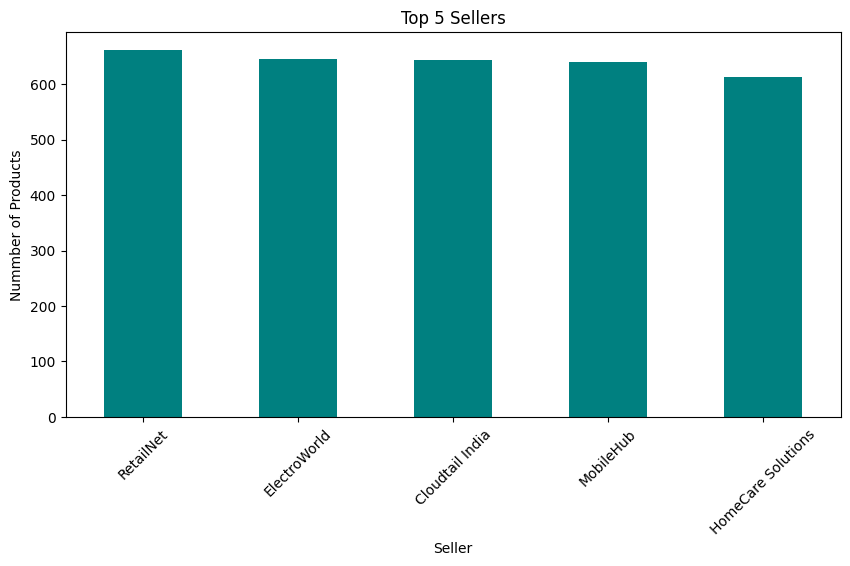

In [16]:
plt.figure(figsize=(10,5))
df['Seller'].value_counts().head(5).plot(kind='bar', color='teal')
plt.title("Top 5 Sellers")
plt.ylabel("Nummber of Products")
plt.xticks(rotation=45)
plt.show()

**Correlation Analysis:**

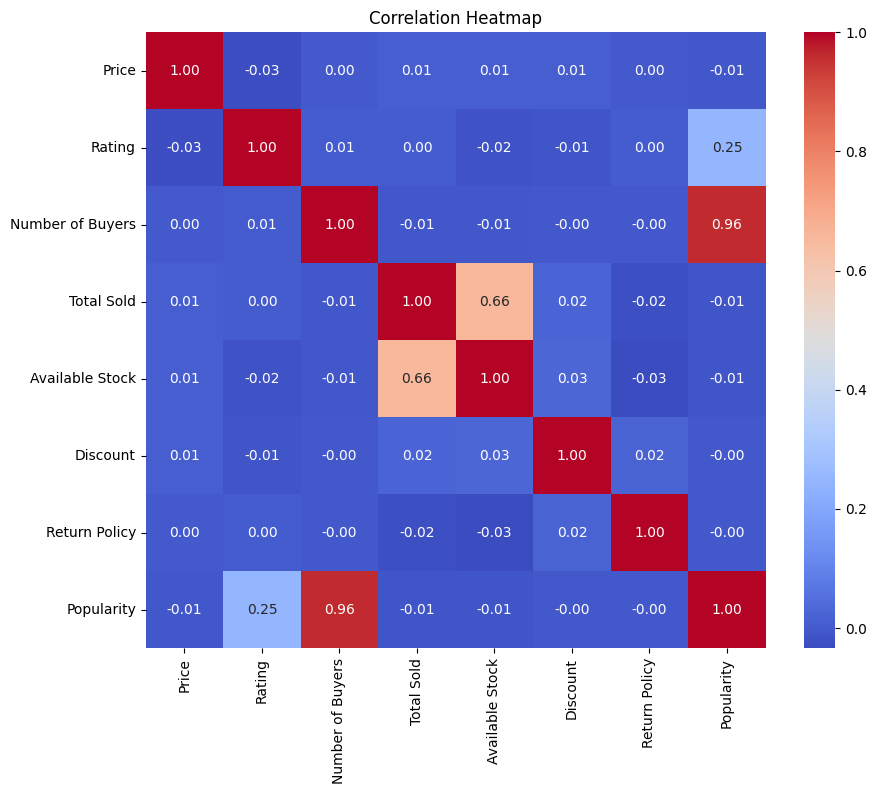

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

This correlation heatmap helps us understand how different features (like Price, Rating, Number of Buyers, etc.) relate to each other on a scale from -1 to 1:

**Key Observations:**
- Number of Buyers and Popularity (0.96):

    - Very strong positive correlation.

    - As the number of buyers increases, the popularity of a product also increases, which makes intuitive sense.

- Total Sold and Available Stock (0.66):

    - Strong positive correlation.

    - This may suggest that products with high stock levels also tend to sell more, possibly due to better availability or demand anticipation.

- Rating and Popularity (0.25):

    - Moderate positive correlation.

    - Higher ratings somewhat contribute to popularity, but not as strongly as the number of buyers.

- Low or No Correlation:

    - Price, Discount, and Return Policy show very weak or no correlation with most variables.

    - This suggests that these factors may not significantly impact other variables like popularity or number of buyers in this dataset.

- Negligible Correlations (~0):

    - Many features show close to zero correlation with each other, meaning they’re likely independent.

**Conclusions:**

- Popularity is driven mainly by the Number of Buyers, not so much by Price or Discounts.

- Stock management (Available Stock) might influence or reflect sales trends.

- Ratings do matter but aren’t the strongest driver of popularity or sales alone.

- Discounts and return policies may have indirect or delayed effects not captured in linear correlations.

<a name='6'></a>
## 6. Normalize numerical features

In [18]:
scaler = MinMaxScaler()
numerical_features = ['Price', 'Rating', 'Number of Buyers', 'Total Sold', 'Available Stock', 'Discount', 'Popularity']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

<a name='7'></a>
## 7. Encode categorical features

In [19]:
categorical_features = ['Main Category', 'Sub Category', 'Seller', 'Return Policy', 'Price_Category']
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

<a name = "8"></a>
## 8. Saving Processed data

In [20]:
df.to_csv('processed_products.csv', index=False)
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)

In [21]:
pp = pd.read_csv('processed_products.csv')
pp.head(5)

,Product Name,Price,Rating,Number of Buyers,Total Sold,Available Stock,Main Category,Sub Category,Discount,Seller,Return Policy,Product URL,Popularity,Price_Category
0,Krishnamurthy-Devan Laboriosam Ultra Smartphon...,0.570736,0.10,0.734508,0.478593,0.073924,1,12,0.642857,6,0,https://www.flipkart.com/Krishnamurthy-Devan-L...,0.474005,0
1,Nanda-Mahal Dignissimos Lite Laptops 1,0.750113,0.55,0.233357,0.083518,0.029448,1,7,0.785714,3,0,https://www.flipkart.com/Nanda-Mahal-Dignissim...,0.193016,0
2,Choudhury LLC Amet Plus Decor 15,0.047149,1.00,0.072880,0.254271,0.041836,3,1,0.828571,7,1,https://www.flipkart.com/Choudhury-LLC-Amet-Pl...,0.073700,1
3,Borah LLC Accusantium Lite Smartphones 9,0.043218,0.90,0.153369,0.453467,0.321893,1,12,0.000000,1,0,https://www.flipkart.com/Borah-LLC-Accusantium...,0.148664,1
4,Murty Inc Placeat Pro Smartwatches 8,0.131897,0.75,0.769947,0.489950,0.216084,1,13,0.257143,5,0,https://www.flipkart.com/Murty-Inc-Placeat-Pro...,0.699124,3
